# Overview of Hostile Post Detection in Hindi
- **Goals:** To predict the label set of the set of post collected from Twitter and facebook.

- **Traning data:** post with their label.

- **Tesing data:** set of posts.
- **Types of post:** 
1. *Fake News:* A claim or information that is verified to be not true.
2. *Hate Speech:* A post targeting a specific group of people based on their ethnicity, religious beliefs, geographical belonging, race, etc., with malicious intentions of spreading hate or encouraging violence.
3. *Offensive:* A post containing profanity, impolite, rude, or vulgar language to insult a targeted individual or group.
4. *Defamation:* A mis-information regarding an individual or group.
5. *Non-hostile:* A post without any hostility.



- **dataset.csv:** contains trainng data.

## Exploring dataset

In [1]:
# importing libraries
import pandas as pd     
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from googletrans import Translator
from translation import google

#### load data

In [2]:
data = pd.read_csv("dataset.csv")

#### How many posts do we have in training set

In [4]:
print("We have", data.shape[0], "posts in the training set.")

We have 5728 posts in the training set.


#### First and last five posts of dataset

In [5]:
data.head()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
0,1,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive",NaN,NaN
1,2,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile,NaN,NaN
2,3,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile,NaN,NaN
3,4,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive",NaN,NaN
4,5,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile,NaN,NaN


In [6]:
data.tail()

,Unique ID,Post,Labels Set,Unnamed: 3,Unnamed: 4
5723,5724,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate,NaN,NaN
5724,5725,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile,NaN,NaN
5725,5726,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile,NaN,NaN
5726,5727,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake,NaN,NaN
5727,5728,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति...,non-hostile,NaN,NaN


#### Information about the attributes and tupples.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unique ID   5728 non-null   int64  
 1   Post        5728 non-null   object 
 2   Labels Set  5728 non-null   object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 223.9+ KB


#### removing extra columns

In [12]:
data=data.drop(data.columns[[0,3,4]], axis=1)

#### New information of data 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
Post          5728 non-null object
Labels Set    5728 non-null object
dtypes: object(2)
memory usage: 89.6+ KB


In [14]:
data.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile


In [15]:
data.tail()

,Post,Labels Set
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate
5724,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile
5725,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake
5727,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति...,non-hostile


#### Calculating the null values in each columns

In [16]:
data.isnull().sum()

Post          0
Labels Set    0
dtype: int64

#### Number of columns and rows in train data set

In [62]:
data.shape
print(data.shape,"is the dimension of the data")

(5728, 2) is the dimension of the data


#### Checking for the duplicates in the dataset.

In [63]:
print(len(data['Post'])-len(set(data['Post'])))

10


In [17]:
dups_shape = data.pivot_table(index=['Post'], aggfunc='size')
print (dups_shape)

Post
\nHimat Gohel\n@himatgohel\nBJP विधायक अनिल उपाध्याय की इस हरकत पर क्या कहेगे मोदी जी, give your \n your Reaction की ये पूरा हिन्दुस्तान देख सके..👇                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

#### Calculating the number and percentage of different types of post.

In [8]:
d={}
total=0
for i in data['Labels Set']:
    ar=list(i.split(','))
    for j in ar:
        try:
            d[j]+=1
        except:
            d[j]=1
        total+=1


percentageHolder={}
for i in d:
    percentageHolder[i]=str((d[i]/total)*100)[:5]+'%'



table={'count':d,'percentage':percentageHolder}
print(pd.DataFrame(table))

             count percentage
hate           792     12.58%
offensive      742     11.79%
non-hostile   3050     48.47%
defamation     564     8.963%
fake          1144     18.18%


#### Represntation of label

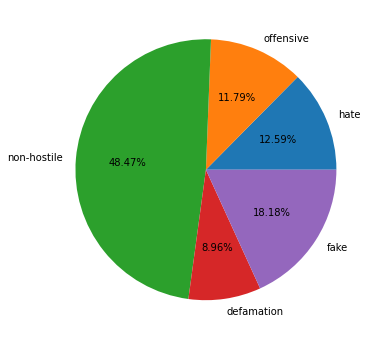

In [9]:
#pie chart creation

labels = list(d.keys())
values = list(d.values())
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,autopct="%1.2f%%")
plt.show()

Analysis:


Data is biased towards non-hostile post.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

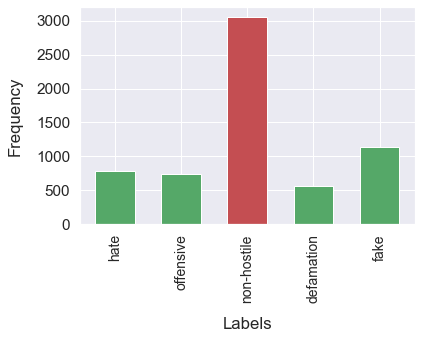

In [12]:
# Bar Plot
plt.bar(d.keys(), d.values(), 0.6, color=['g','g','r','g','g'])
plt.xlabel("Labels", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
# sb.set(font_scale=1.4)
plt.xticks(fontsize=14, rotation=90)

Analysis:

1) We observe that non-hostile posts has the highest proportion i.e more than 3000.

In [ ]:
text='tum kasie ho?'
t=Translator()
print(t.translate('उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ'))

for i in data['Post']:
    try:
        print(t.translate(str(i)))
    except:
        do=1


Translated(src=hi, dest=en, text=Uditraj G dare to raise something to the leader, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=The government always brings new schemes to increase the earnings of farmers, so that no more financial burden on them.

Https://tiksio/8iy2njrshbas, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Sushant has been a business deal, on June 9, he does remember the day after the murder of Sushant deal Dipesh? See asks #LIVE the Republic of India Arnab India ': https://t.co/G945HvzM0Z https://t.co/KfH7xF1IdM, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=@ Prabhav218 gives law JNU impression Kmine people say Hindu Constitution everyone equal rights. The truth is that it does not have equal rights., pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=# Unlock4guidelines - Unlock issued guidelines to -4

- will start train services acr

Translated(src=hi, dest=en, text=JEE: first shift end exams, by leaving students had said fears about the corona, but the joy is that we have a year left https://t.co/9wHy3UhO11 #JEEMain #JEE is, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=When developing countries suffering around the world. The state faced way bout this difficult time is commendable. Yogi has also died of G's father but he continued to serve successive public showed its commitment to the people of the state, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=President headed @PankajSinghAAP Minister held a meeting of officials today Bhopal zone which has been training on the "oxygen probe operation starting from September 1" and Oximeter were distributed.
@Arvindkejrivl @AapKaGopalRai Https://tiksio/6nmrinlg7d, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Stephen Begun by the Indo-US strategic partnership and the th

Translated(src=hi, dest=en, text=#Nordbd
A case of suicide, the hotel manager,
Wife, sister, including a case on 4 people,
Video poison was created account,
Wife-case families have been told would responsible for the death, Civil Lines police station. @Mordbdpoliche @digmordbd @uppoliche #uppinnews #uffoliche #polichemedianews, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=If store distances up to 2 km will be on foot., pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=The Indian government is going to ban the use of urea in the fields. Farming will now stop using urea government, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=RT @aadhiIa: Thackeray BMC army entered bang in POK

Atँkwadi were devastated bunker organizations

Federal terrorists, including the Lashkar-e-Noe ..., pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Big news https://t.co/DCIpXa2Dd

Translated(src=hi, dest=en, text=I'm with the privatization ...

Because 90% Govt of India. Employees take salary to work, and take bribes to work!, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Mehul Choksi and Rana Kapoor paid to #RajivGandhiFoundation; Jinnesh Shah Foundation also paid Rs 50 lakh BJP

Full press conference: Https://tiksio/6HNzre8Q3z Https://tiksio/T5zZ0QlsSf, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Tunnel the Pandavas in the Mahabharata era was built this place in Bihar, where local people are farming today

#Nahbrt #bhihr

Https://tiksio/DVTH8tvQ3u, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=#Folticsdinbr
- salute bravery
- Modi today Tamil Nadu tour
- Return of the rebel BJP! Https://tiksio/MVupTqjtnl, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Honorable MP Ranjan Gogoi Ji received the news of being infected Corona

Translated(src=hi, dest=en, text=If the government has imposed restrictions on the go more than five people for prayers at the mosque, people are willing to give their lives., pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=#Apple could Tomorrow is a big announcement, launching what # would ipadAir4?

Https://tiksio/2ःः3van39ya, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=This decision will provide a great opportunity to build weapons to use the design and development capabilities here in the Indian defense industry or meet the requirements of adopting military technologies developed by DRDO.
# Atmnirbrbartabian
@Narendramodi
@Rjtrthsidarg, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=In this picture are plush Sohfe and world-class interior design does not have the drawing room is the nation's # purchased prime Boing- 777 VVIP aircraft on Earth.In live much luxury life you're gonna

Translated(src=hi, dest=en, text=Indian Army was going to air strikes in Nepal. However, Nepal's army has demolished the aircraft., pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=Largest Fucking Naughty pimp swollen issues with https://t.co/6wiksUdR3v, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=1000 square km LAC. The area occupied by China ': Press Review https://t.co/tQNf3NWsE5, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=@Pawankhera wind G
There was a man lying day and all the people know that lying
And then next day was when speaking it was true, but the people that believed that it ended a dominant am so Congress speaking fuckin lie Now you guys relax under the tamarind tree, pronunciation=None, extra_data="{'translat...")
Translated(src=hi, dest=en, text=@ZeeNews
In front of the slogan started Pakistan Zindabad in Mumbai also Minister, pronunciation=None, extra_data="{'tra